In [169]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import scipy.stats as stats

In [116]:
import warnings
import types
warnings.simplefilter(action='ignore', category=FutureWarning)

In [117]:
autor = pd.read_csv('autores.csv',delimiter=';')
docente = pd.read_csv('docente.csv',delimiter=';')
publ = pd.read_csv('publicacao.csv',delimiter=';')
qualis = pd.read_csv('qualis_score.csv',delimiter=';')

# Carolina tem que ficar no TOP 5
### Heitor não

In [118]:
autor

,id_publicacao,id_autor
0,164,10
1,165,3
2,77,9
3,121,1
4,144,6
...,...,...
256,29,5
257,156,5
258,155,4
259,171,7


In [203]:
# Eles não tem publicacao conjunta
asd = autor[autor['id_autor'].isin([3,8])].groupby('id_publicacao').count()
asd[asd['id_autor'] > 1]

,id_autor
id_publicacao,


In [119]:
docente

,id,nome,idade_doutorado
0,1,Alex,7
1,2,Beto,10
2,3,Carolina,5
3,4,Debora,10
4,5,Eric,7
5,6,Fabiana,7
6,7,Gabriela,12
7,8,Heitor,11
8,9,Iara,9
9,10,Juca,11


In [120]:
publ

,id,tipo,qualis,ano
0,1,E,B1,2020
1,2,P,B1,2022
2,3,E,A3,2023
3,4,E,B4,2021
4,5,P,A4,2023
...,...,...,...,...
184,185,P,A1,2020
185,186,E,A1,2023
186,187,E,A4,2023
187,188,E,B4,2021


In [121]:
qualis

,qualis,tipo,score,restrito
0,A1,E,1.00000,True
1,A2,E,0.87500,True
2,A3,E,0.75000,True
3,A4,E,0.62500,True
4,B1,E,0.50000,False
5,B2,E,0.20000,False
6,B3,E,0.10000,False
7,B4,E,0.05000,False
8,A1,P,1.25000,True
9,A2,P,1.09375,True


In [122]:
publ.merge(qualis,left_on=['qualis','tipo'],right_on=['qualis','tipo'],how='inner')

,id,tipo,qualis,ano,score,restrito
0,1,E,B1,2020,0.50000,False
1,2,P,B1,2022,0.62500,False
2,3,E,A3,2023,0.75000,True
3,4,E,B4,2021,0.05000,False
4,5,P,A4,2023,0.78125,True
...,...,...,...,...,...,...
184,185,P,A1,2020,1.25000,True
185,186,E,A1,2023,1.00000,True
186,187,E,A4,2023,0.62500,True
187,188,E,B4,2021,0.05000,False


In [123]:
autor.merge(docente,left_on='id_autor',right_on='id',how='inner').drop('id',axis=1)

,id_publicacao,id_autor,nome,idade_doutorado
0,164,10,Juca,11
1,165,3,Carolina,5
2,77,9,Iara,9
3,121,1,Alex,7
4,144,6,Fabiana,7
...,...,...,...,...
256,29,5,Eric,7
257,156,5,Eric,7
258,155,4,Debora,10
259,171,7,Gabriela,12


In [124]:
publ.merge(autor,left_on='id',right_on='id_publicacao',how='inner').drop('id',axis=1)

,tipo,qualis,ano,id_publicacao,id_autor
0,E,B1,2020,1,4
1,P,B1,2022,2,1
2,P,B1,2022,2,5
3,E,A3,2023,3,9
4,E,B4,2021,4,6
...,...,...,...,...,...
256,P,A1,2020,185,3
257,E,A1,2023,186,3
258,E,A4,2023,187,4
259,E,B4,2021,188,6


In [125]:
all_merge = publ.merge(
    autor.merge(docente,left_on='id_autor',right_on='id',how='left').drop(['id','id_autor'],axis=1) # só pra dar nome na coluna de publicacoes
    ,left_on='id',right_on='id_publicacao',how='left').drop('id',axis=1)

all_merge = all_merge.merge(qualis,left_on=['qualis','tipo'],right_on=['qualis','tipo'],how='inner')

In [126]:
#all_merge = all_merge[(all_merge['nome'] == 'Heitor') | (all_merge['nome'] == 'Carolina')]

In [249]:
all_merge.nunique()

tipo                 2
qualis               8
ano                  4
id_publicacao      189
nome                11
idade_doutorado      7
score               13
restrito             2
dtype: int64

### Quantas publicações cada um tem

<Axes: xlabel='nome'>

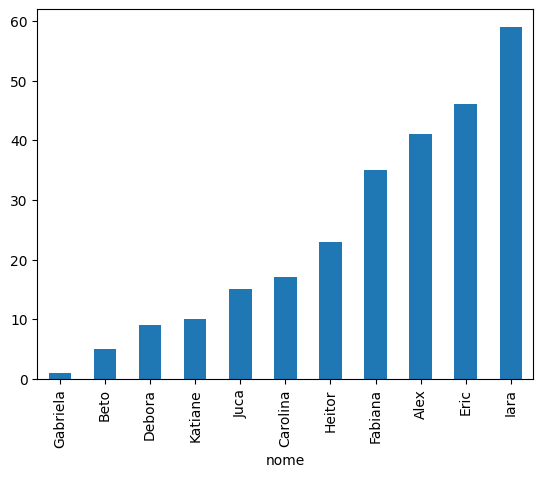

In [289]:
comp1 = all_merge.groupby('nome').count()['id_publicacao'].sort_values(ascending=True)
comp1.plot(kind='bar')

### Quantas publicações conjuntas cada um tem

In [281]:
pubs1 = autor[autor['id_autor'].isin([3,8])]['id_publicacao']
asd = autor[autor['id_publicacao'].isin(pubs1)].groupby('id_publicacao').count() # contagem de autores por publicacao
pubs_em_conjunto = asd[asd['id_autor'] > 1].sort_values(by='id_autor').index

count_por_autor = autor[(autor['id_autor'].isin([3,8])) & (autor['id_publicacao'].isin(pubs_em_conjunto))].sort_values(by='id_autor').groupby('id_autor').count()
count_por_autor.merge(docente[['id','nome']],left_on='id_autor',right_on='id',how='left').set_index('nome').rename(columns={"id_publicacao": "quantidade"}).drop('id',axis=1)
#asd = autor.loc[autor['id_publicacao'].isin(pubs1)]
#asd = asd.groupby('id_publicacao').count()
#asd[asd['id_autor'] > 1]

,quantidade
nome,
Carolina,1
Heitor,23


<div>
<img src="image.png" width="800"/>
</div>


### Soma dos scores pra cada autor ( somente alto impacto )

,ano,idade_doutorado,score
nome,,,
Gabriela,2021,12,0.62500
Debora,10109,50,3.71875
Beto,10108,50,5.46875
Katiane,16166,120,6.21875
Juca,22240,121,9.59375
Heitor,30327,165,13.34375
Carolina,30327,75,15.40625
Fabiana,46500,161,21.34375
Alex,50540,175,22.25000


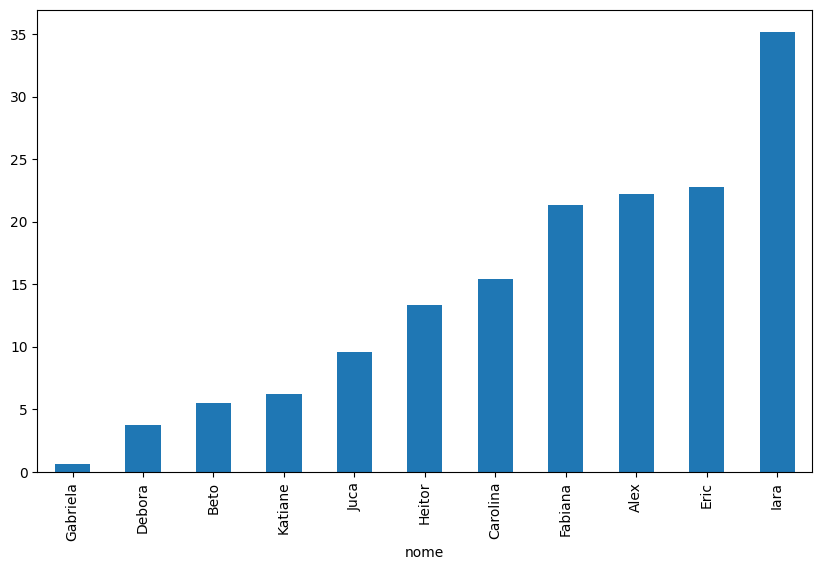

In [149]:
fig, ax1 = plt.subplots(1,1,figsize=(10,6))
df11 = all_merge[all_merge['qualis'].isin(['A1','A2','A3','A4'])].groupby(['nome']).sum().sort_values(by='score',ascending=True)
df11['score'].plot(kind='bar')
df11[['ano','idade_doutorado','score']]
#ax1.plot(df11)
#.plot(kind='barh',cmap=plt.get_cmap('Spectral'),edgecolor=None)
#plt.legend()

### Fazer Reg plot

### Argumento deles: "Nosso score é maior"
### Nosso Argumento: "O score é inflado de publicações de baixo impacto, ao filtrar por alto impacto, vemos que carolina se sobressai"

In [129]:
#quantas publicacoes p/ prof
all_merge.groupby('nome').size().sort_values()

nome
Gabriela     1
Beto         5
Debora       9
Katiane     10
Juca        15
Carolina    17
Heitor      23
Fabiana     35
Alex        41
Eric        46
Iara        59
dtype: int64

In [238]:
#all_merge.groupby('nome').groups.__len__()

### Valor médio de qualis
### vai apontar a consistencia do autor em publicações

### Média + STD de todas as publicacoes

In [240]:
all_merge[(all_merge['nome'].isin(['Carolina','Heitor'])) ].groupby('nome').describe()['score'][['mean','std']]

,mean,std
nome,,
Carolina,0.945956,0.314672
Heitor,0.720924,0.323036


### Média + STD de todas as publicacoes Alto impacto

In [243]:
all_merge[(all_merge['nome'].isin(['Carolina','Heitor'])) & (all_merge['qualis'].isin(['A1','A2','A3','A4']))].groupby('nome').describe()['score'][['mean','std']]

,mean,std
nome,,
Carolina,1.027083,0.203508
Heitor,0.889583,0.213543


### Número de publicacoes A1-A4 dos 2
### Ambos tem o mesmo numero de publicacoes de alto impacto

In [178]:
all_merge[(all_merge['nome'].isin(['Carolina','Heitor'])) & (all_merge['qualis'].isin(['A1','A2','A3','A4']))].groupby('nome').count()

,tipo,qualis,ano,id_publicacao,idade_doutorado,score,restrito
nome,,,,,,,
Carolina,15,15,15,15,15,15,15
Heitor,15,15,15,15,15,15,15


### Qual a distribuição das publicações com base no score total

<Axes: xlabel='score'>

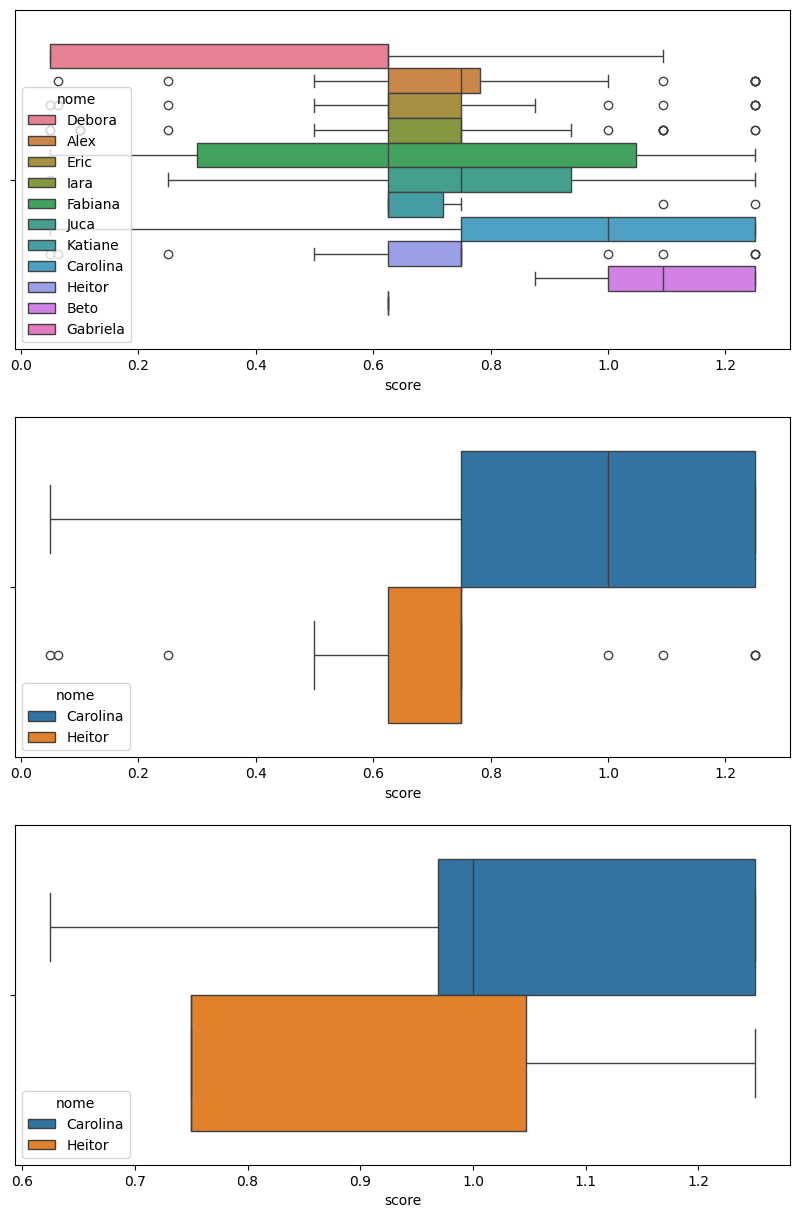

In [167]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,15))
sns.boxplot(all_merge,x='score',hue='nome',ax=ax1)
sns.boxplot(all_merge[all_merge['nome'].isin(['Carolina','Heitor'])],x='score',hue='nome',ax=ax2)
sns.boxplot(all_merge[(all_merge['nome'].isin(['Carolina','Heitor'])) & (all_merge['qualis'].isin(['A1','A2','A3','A4']))],x='score',hue='nome',ax=ax3)
#all_merge[all_merge['qualis'].isin(['A1','A2','A3','A4'])].groupby('nome').mean()['score']


### Qual o histórico de publicacoes de ambos
### O quão recentes são as publicacoes

In [264]:
regplot1 = all_merge[(all_merge['nome'].isin(['Carolina','Heitor']))].sort_values(by='ano').groupby(['nome','ano']).count()
regplot1

tipo  qualis  id_publicacao  idade_doutorado  score  restrito
nome     ano                                                                
Carolina 2020     4       4              4                4      4         4
         2021     2       2              2                2      2         2
         2022     3       3              3                3      3         3
         2023     8       8              8                8      8         8
Heitor   2020     6       6              6                6      6         6
         2021     6       6              6                6      6         6
         2022     5       5              5                5      5         5
         2023     6       6              6                6      6         6

[Text(0, 0.5, 'Contagem anual'),

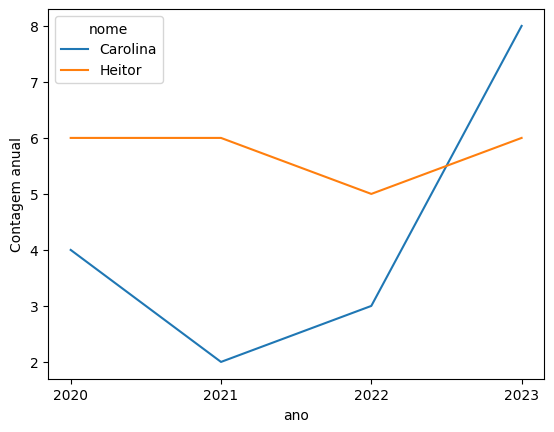

In [280]:
sns.lineplot(regplot1,x='ano',y='tipo',hue='nome').set(ylabel='Contagem anual',xticks=all_merge.ano.unique())


### Pensem em métricas (total, top 5. top 10, melhor de cada ano), considerem o impacto de publicações conjuntas

---

## Garbage

Alex
41.0
nome
Alex    41.0
dtype: float64
Beto
5.0
nome
Beto    5.0
dtype: float64


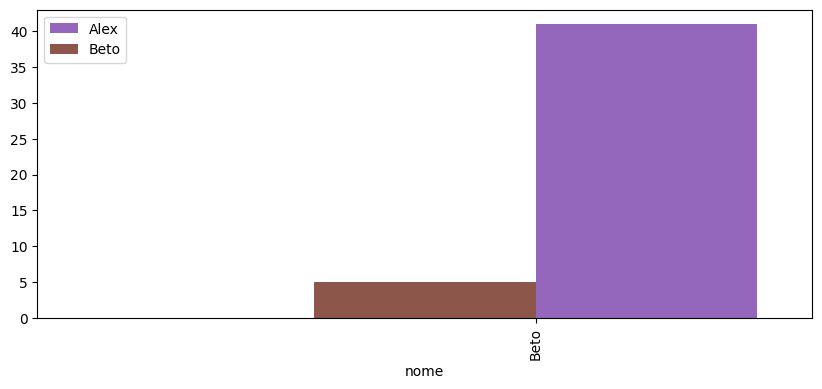

In [131]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
for i,k in zip(all_merge.groupby('nome').groups,[0,1]):
    print(i)
    j = all_merge[all_merge.nome==i]
    rs1 = j.groupby('nome').count().sum(axis=1) / j.groupby('nome').count().columns.__len__()
    print(j.count().mean())
    print(rs1)
    rs1.plot(kind='bar',ax=ax,width=0.2,position=k,color=plt.cm.tab10(k+4),label=i)
    #all_merge[all_merge.nome==i].count().hist(column='score',sharex=True,grid=False,sharey=True,ax=ax,legend=i)
plt.legend()

Alex
41.0
score
0.06250     1.0
0.25000     1.0
0.50000     6.0
0.62500    11.0
0.75000    11.0
0.78125     1.0
1.00000     4.0
1.09375     1.0
1.25000     5.0
dtype: float64
Beto
5.0
score
0.87500    1.0
1.00000    1.0
1.09375    1.0
1.25000    2.0
dtype: float64


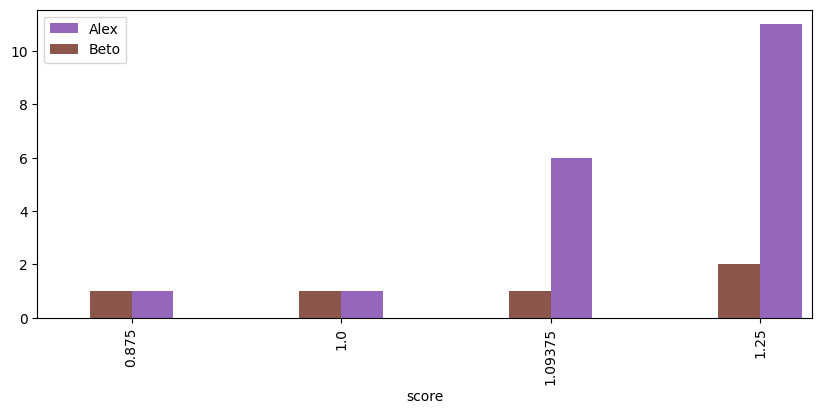

In [132]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
for i,k in zip(all_merge.groupby('nome').groups,[0,1]):
    print(i)
    j = all_merge[all_merge.nome==i]
    rs1 = j.groupby('score').count().sum(axis=1) / j.groupby('score').count().columns.__len__()
    print(j.count().mean())
    print(rs1)
    rs1.plot(kind='bar',ax=ax,width=0.2,position=k,color=plt.cm.tab10(k+4),label=i)
    #all_merge[all_merge.nome==i].count().hist(column='score',sharex=True,grid=False,sharey=True,ax=ax,legend=i)
plt.legend()